**Problem 1.** 
## Peak Hour Analysis for Taxi Demand
### Background
Urban centers experience fluctuating taxi demand due to various factors such as time of day, day of the week, and special events. Understanding these fluctuations can help in optimizing taxi dispatches and planning public transportation needs.

### Task
Using the New York Taxi dataset for the month of december (available on blackboard), you are tasked to identify peak and off-peak hours for taxi demand in New York City. This analysis should be based on the `tpep_pickup_datetime` focusing on temporal data analysis rather than spatial clustering.

### Requirements

#### Data Preprocessing
- **Convert `tpep_pickup_datetime` from string to datetime format.**
  This step is crucial for any time series analysis, enabling you to extract meaningful temporal features from the dataset.
- **Extract the hour of the day and day of the week from `tpep_pickup_datetime`.**
  These features will be pivotal in analyzing the demand patterns across different times and days.

#### Exploratory Data Analysis (EDA)
- **Analyze the distribution of taxi trips throughout the day and week.**
  Start by understanding the overall distribution of taxi trips to spot any immediate patterns or trends.
- **Visualize taxi demand trends to identify potential peak hours.**
  Visualization is a powerful tool to uncover underlying trends and cycles in taxi demand throughout the day and week.

#### Clustering with K-means
- **Use K-means clustering on the extracted temporal features to group hours into clusters representing different levels of taxi demand (e.g., low, medium, high).**
  This step involves applying the K-means clustering algorithm to categorize hours into distinct clusters based on demand.
- **Determine the optimal number of clusters using the Elbow Method or Silhouette Score.**
  Selecting the right number of clusters is critical for meaningful segmentation. The Elbow Method and Silhouette Score are two techniques that can help identify the most appropriate number of clusters.

#### Analysis and Interpretation
- **Analyze the characteristics of each cluster to identify peak and off-peak demand hours.**
  Once you've clustered the data, the next step is to interpret these clusters. Look for patterns that signify peak demand hours, and contrast them with off-peak times. Understanding these patterns is crucial for making informed recommendations for taxi dispatches and public transportation planning.

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('yellow_tripdata_2019-12.csv')

C:\Users\dwtro\AppData\Local\Temp\ipykernel_16280\754676139.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('yellow_tripdata_2019-12.csv')


In [7]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.50,3.00,0.5,0.0,0.00,0.3,18.30,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.50,0.50,0.5,10.0,0.00,0.3,39.80,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.00,3.00,0.5,0.0,0.00,0.3,12.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896312,NaN,2019-12-31 00:07:00,2019-12-31 00:46:00,NaN,12.78,NaN,NaN,230,72,NaN,32.32,2.75,0.5,0.0,6.12,0.3,41.99,0.0
6896313,NaN,2019-12-31 00:20:00,2019-12-31 00:47:00,NaN,18.52,NaN,NaN,219,32,NaN,51.63,2.75,0.5,0.0,6.12,0.3,61.30,0.0
6896314,NaN,2019-12-31 00:50:00,2019-12-31 01:21:00,NaN,13.13,NaN,NaN,161,76,NaN,38.02,2.75,0.5,0.0,6.12,0.3,47.69,0.0
6896315,NaN,2019-12-31 00:38:19,2019-12-31 01:19:37,NaN,14.51,NaN,NaN,230,21,NaN,41.86,2.75,0.0,0.0,6.12,0.3,51.03,0.0


In [8]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [9]:
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

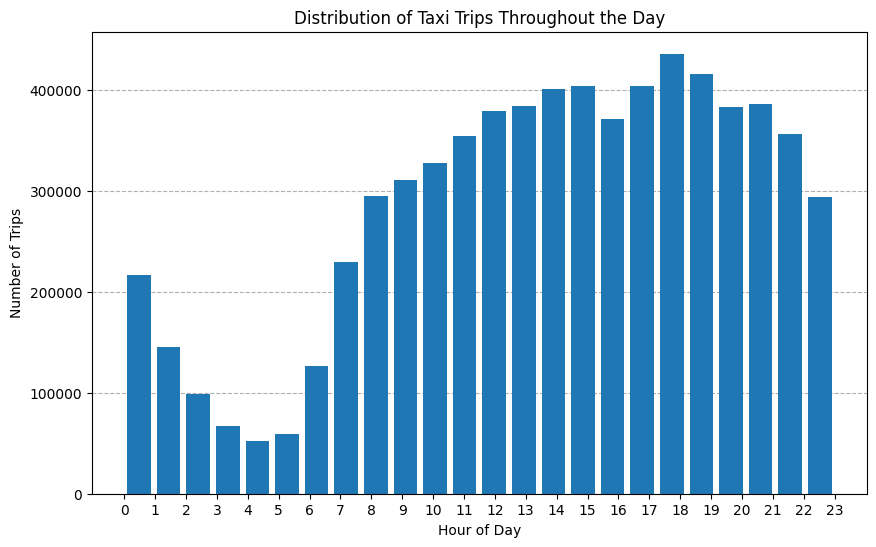

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['hour_of_day'].hist(bins=24, rwidth=0.8, zorder=2, grid=False)
plt.title('Distribution of Taxi Trips Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', zorder=0)
plt.show()

## Problem 2

Please follow the instructions below to implement the "Chat with PDF" app, as described in this [article by Gaurav Jaik](https://medium.com/@gaurav.jaik86/building-an-ai-powered-chat-with-pdf-app-with-streamlit-langchain-faiss-and-llama2-affadea65737).

### Steps:

1. **Model Download:** 
   - Download the Llama2 model from Hugging Face: [Llama-2-7b-Chat-GGUF](https://huggingface.co/TheBloke/Llama-2-7b-Chat-GGUF/resolve/main/llama-2-7b-chat.Q4_K_M.gguf)

2. **Create Python Files:**
   - `app.py`: To create the app interface.
   - `loadllm.py`: To load the Llama2 model locally.
   - `fileingestor.py`: To upload a PDF file and create a chain for question answering.

3. **Run the App:**
   - Execute the command `streamlit run app.py` in your terminal. This command will launch the app on [http://localhost:8501](http://localhost:8501).

4. **Usage:**
   - You can upload any PDF file to the app, run a query on the uploaded PDF, and receive responses.

5. **Capture Screenshots:**
   - Take screenshots of the uploaded PDF, the query you invoked, and the response received from the app.

6. **Performance Metrics:**
   - Record the total time it took to run the query and the number of tokens processed.

7. **Experimentation:**
   - Feel free to experiment by using another model. Change the model path in the `loadllm.py` file and rerun the Streamlit app with the same PDF file and query. Report your findings.

Please ensure to follow each step carefully to successfully create and run your "Chat with PDF" app.

## Problem 3

The task involves engaging with a local Large Language Model (LLM) to create a concise summary on a topic of your interest. Follow the steps below to complete this task:

### Instructions:

1. **Prompt Design:**
   - Decide on a prompt related to a topic that interests you. The prompt should be clear and concise to ensure that the LLM understands the task.

2. **Experimentation:**
   - Experiment with the accuracy of the LLM's responses by varying the temperature and other parameters. This may involve adjusting settings like response length, creativity level (temperature), and specificity to refine the output.

3. **Documentation:**
   - Document the following in your submission:
     - The prompt you used.
     - The specific LLM utilized for generating the summary.
     - The generated text by the LLM.

### Goal:

- The objective is to capture the key points of your chosen topic in bullet points through the LLM's generated summary. This exercise will not only familiarize you with the capabilities and flexibility of LLMs but also help you understand how varying parameters can affect the quality and focus of generated content.

Remember, the clarity and specificity of your prompt, along with the thoughtful adjustment of LLM parameters, are crucial in obtaining a meaningful and concise summary of your chosen topic.